In [68]:
from pycaret.regression import *
import pandas as pd

In [62]:
data = pd.read_pickle('dataset.pkl')

In [70]:
# split data to include last 5 months as test set
fourMonthsBefore = datetime.datetime(2023, 4, 1).timestamp()
train = data[data['timestamp'] <= fourMonthsBefore]
print(train.shape)
test = data[data['timestamp'] > fourMonthsBefore]
print(test.shape)

(6560, 18)
(1224, 18)


In [71]:
from pycaret.regression import RegressionExperiment
exp = RegressionExperiment()
exp.setup(train, target = 'Volume', session_id = 1, test_data=test)

,Description,Value
0,Session id,1
1,Target,Volume
2,Target type,Regression
3,Original data shape,"(7784, 18)"
4,Transformed data shape,"(7784, 18)"
5,Transformed train set shape,"(6560, 18)"
6,Transformed test set shape,"(1224, 18)"
7,Numeric features,15
8,Categorical features,2
9,Preprocess,True


In [72]:
best = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,13:37:09
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,15509.3038,458859684.1724,21361.7617,0.9407,0.3877,0.2168,0.0800
et,Extra Trees Regressor,16190.9850,649904340.8097,25439.3548,0.9158,0.3360,0.1538,0.1390
rf,Random Forest Regressor,17912.1512,709911507.3851,26599.6922,0.9082,0.3803,0.2109,0.2150
gbr,Gradient Boosting Regressor,24854.7318,1169382972.8772,34156.7355,0.8490,0.5001,0.3726,0.0860
dt,Decision Tree Regressor,20858.9709,1365509628.1419,36913.5168,0.8234,0.3620,0.1875,0.0190
knn,K Neighbors Regressor,36094.3465,2375607705.6000,48715.8816,0.6931,0.6646,0.7480,0.0310
ada,AdaBoost Regressor,45638.9251,3124797682.3627,55881.8230,0.5962,0.8158,1.2408,0.0610
ridge,Ridge Regression,44139.8901,3242954808.8961,56926.3898,0.5811,0.7025,0.9231,0.0250
llar,Lasso Least Angle Regression,44141.7283,3242946292.7208,56926.4353,0.5811,0.7014,0.9264,0.0180
lasso,Lasso Regression,44141.7625,3242944732.6593,56926.4232,0.5811,0.7015,0.9264,0.3020


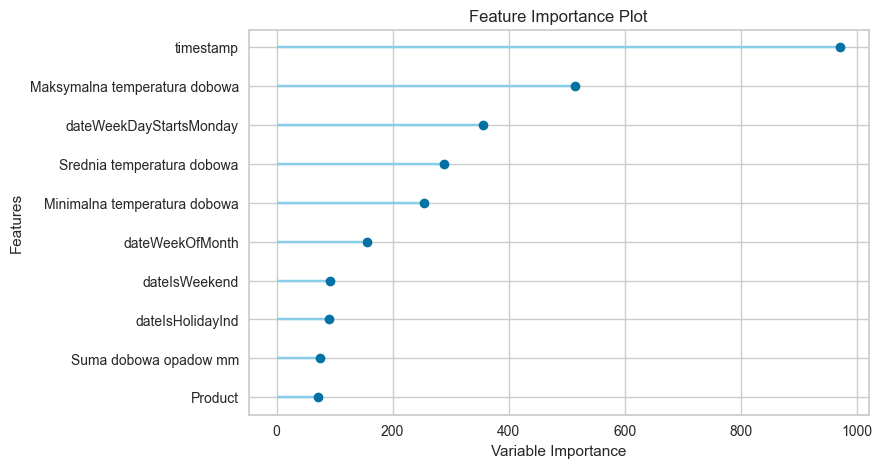

In [73]:
plot_model(best, plot = 'feature')

# Prediction of the last 4 months with LGBM

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,15215.1835,428090392.6865,20690.3454,0.9442,0.4599,0.2524


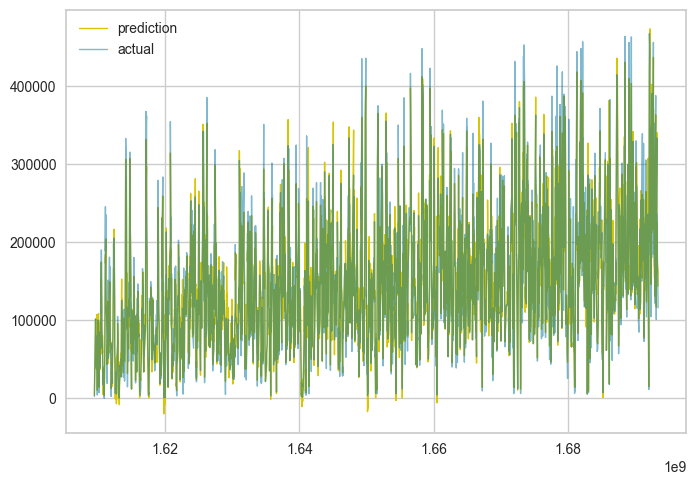

In [102]:
# plot labeled test data and predictions
predicted = predict_model(best)
from matplotlib import pyplot as plt
predicted.sort_values(by='timestamp', inplace=True)
x1 = predicted['timestamp'].astype('int64')
y1 = predicted['prediction_label'].astype('int64')
x2 = x1
y2 = predicted['Volume'].astype('int64')
plt.rcParams['lines.linewidth'] = 1
plt.plot(x1, y1, 'y', label='prediction')
plt.plot(x2, y2, 'b', label='actual', alpha=0.5)
plt.legend()
plt.show()

In [105]:
# save the model
save_model(best, 'models/LGBM_20kRMSE')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['dateWeekOfMonth', 'dateQuarter',
                                              'dateIsWeekend',
                                              'dateIsHolidayInd',
                                              'dateWeekDayStartsMonday',
                                              'timestamp',
                                              'VolumeAvgLast3months',
                                              'VolumeAvgLast6months',
                                              'VolumeAvgLast9months',
                                              'VolumeAvgLast12months',
                                              'Maksymalna temperatura dobowa',
                                              'Minimalna temperatura dobowa'...
                                     transformer=OrdinalEncoder(cols=['Product',
                                                           

In [108]:
# load the model
lbgm_model = load_model('models/LGBM_20kRMSE')
lbgm_model

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\pasha\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['dateWeekOfMonth', 'dateQuarter',
                                             'dateIsWeekend',
                                             'dateIsHolidayInd',
                                             'dateWeekDayStartsMonday',
                                             'timestamp',
                                             'VolumeAvgLast3months',
                                             'VolumeAvgLast6months',
                                             'VolumeAvgLast9months',
                                             'VolumeAvgLast12months',
                                             'Maksymalna tempera...
                                    transformer=OrdinalEncoder(cols=['Product',
                                                                     'Customer'],
                                                               handle_missing='return_nan',
                                                               mapping=[{'col': 'Product',
                                                                         'data_type': dtype('O'),
                                                                         'mapping': APM        0
COURIER    1
NaN       -1
dtype: int64},
                                                                        {'col': 'Customer',
                                                                         'data_type': dtype('O'),
                                                                         'mapping': Rest    0
X       1
NaN    -1
dtype: int64}]))),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('trained_model', LGBMRegressor(n_jobs=-1, random_state=1))])

In [114]:
# predict on one sample
sample = test.sample()

prediction = predict_model(lbgm_model, data=sample)
print("Predicted Volume: ", prediction['prediction_label'].values[0])
print("Actual Volume: ", sample['Volume'].values[0])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,14.6168,213.6504,14.6168,nan,0.0001,0.0001


Predicted Volume:  123449.59334590465
Actual Volume:  123434.97832013488
